<a href="https://colab.research.google.com/github/RodriMec/AvaMobile/blob/master/Auto_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Importando as bibliotecas
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
!pip install pmdarima
from pmdarima.arima import auto_arima
from sklearn.preprocessing import StandardScaler
!pip install statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt



In [70]:
import pandas as pd

# Carregar a base de dados, corrigindo o formato da data
data = pd.read_csv('/content/Arquivos Data Science.csv', sep=';', parse_dates=['DATE'], index_col='DATE')

# Garantir que a coluna 'DATE' seja convertida corretamente para o formato mês-ano (m-aaaa)
data.index = pd.to_datetime(data.index, format='%m-%Y')

# Verificar as primeiras linhas para garantir que os dados foram carregados corretamente
print(data.head(70))


           Taxa Real Efetiva  Reservas Internacionais   IPCA Taxa Selic  \
DATE                                                                      
2014-01-01              95,6                   360936   0,55       0,03   
2014-01-04             87,63                   366717   0,67       0,04   
2014-01-07             87,49                   376792   0,01       0,04   
2014-01-10             92,87                   375833   0,42       0,04   
2015-01-01             93,33                   361767   1,24       0,04   
2015-01-04            103,69                   364473   0,71       0,04   
2015-01-07            108,32                   368252   0,62       0,05   
2015-01-10            127,47                   361230   0,82       0,05   
2016-01-01            122,64                   357507   1,27       0,05   
2016-01-04            110,04                   362201   0,61       0,05   
2016-01-07             99,55                   369340   0,52       0,05   
2016-01-10             95

In [71]:
import pandas as pd

# Carregar a base de dados, garantindo que os números e datas sejam tratados corretamente
data = pd.read_csv('/content/Arquivos Data Science.csv', sep=';', parse_dates=['DATE'], index_col='DATE')

# Substituir as vírgulas por pontos nas colunas numéricas
data = data.replace({',': '.'}, regex=True)

# Converter as colunas para tipo numérico
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Garantir que a coluna 'DATE' seja convertida corretamente para o formato mês-ano (m-aaaa)
data.index = pd.to_datetime(data.index, format='%m-%Y')

# Verificar as primeiras linhas para garantir que os dados foram carregados corretamente
print(data.head())


            Taxa Real Efetiva  Reservas Internacionais  IPCA  Taxa Selic  \
DATE                                                                       
2014-01-01              95.60                   360936  0.55        0.03   
2014-01-04              87.63                   366717  0.67        0.04   
2014-01-07              87.49                   376792  0.01        0.04   
2014-01-10              92.87                   375833  0.42        0.04   
2015-01-01              93.33                   361767  1.24        0.04   

             PIB EUA  Valor Dolar  
DATE                               
2014-01-01  17197.74       2.3972  
2014-01-04  17518.51       2.2617  
2014-01-07  17804.23       2.2051  
2014-01-10  17912.08       2.4620  
2015-01-01  18063.53       2.6926  


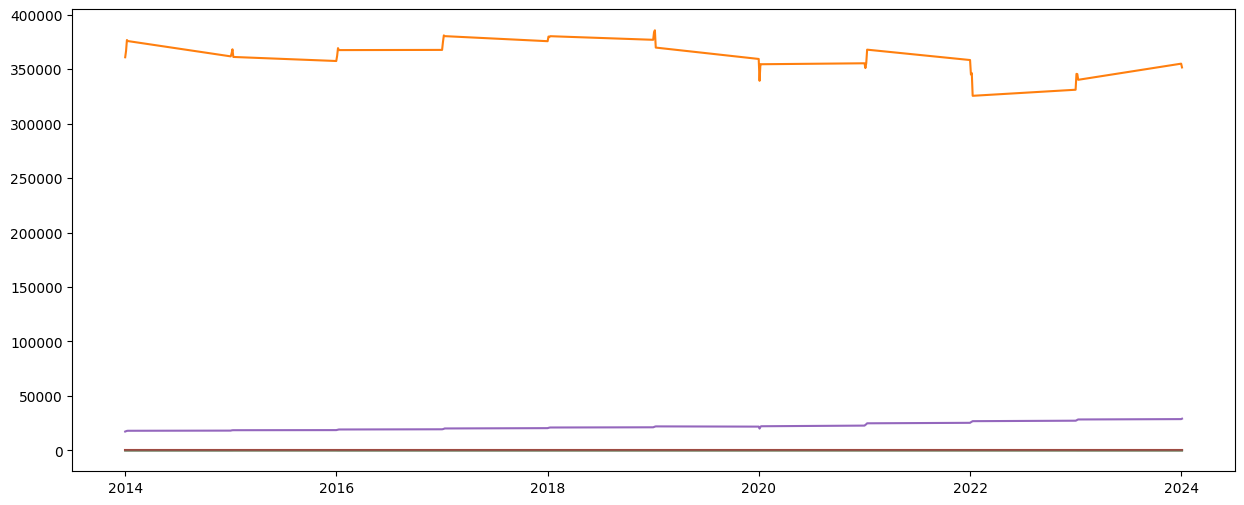

In [72]:
#Visualizar o dado
plt.plot(data)

PREVISÕES BASEADAS NAS VARIÁVEIS

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=297.610, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=298.836, Time=0.11 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=300.602, Time=0.15 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=298.732, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=300.696, Time=0.14 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=302.291, Time=0.69 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=300.675, Time=0.19 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=299.506, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=300.717, Time=0.09 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=302.511, Time=0.26 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=300.620, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=302.593, Time=0.22 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=304.220, Time=0.90 sec
 ARIMA(0,1,1)(2,0,

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Valor Dolar   No. Observations:                   42
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  20.401
Date:                Sun, 01 Dec 2024   AIC                            -24.802
Time:                        23:28:44   BIC                            -11.093
Sample:                             0   HQIC                           -19.810
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7257      0.075      9.632      0.000       0.578       0.873
x2            -0.0789      0.057     -1.374      0.169      -0.191       0.034
x3            -0.0145      0.027     -0.536      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-73-9b0e14bb60d3>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=36, freq='M'), previsao, label='Previsão', color='red')


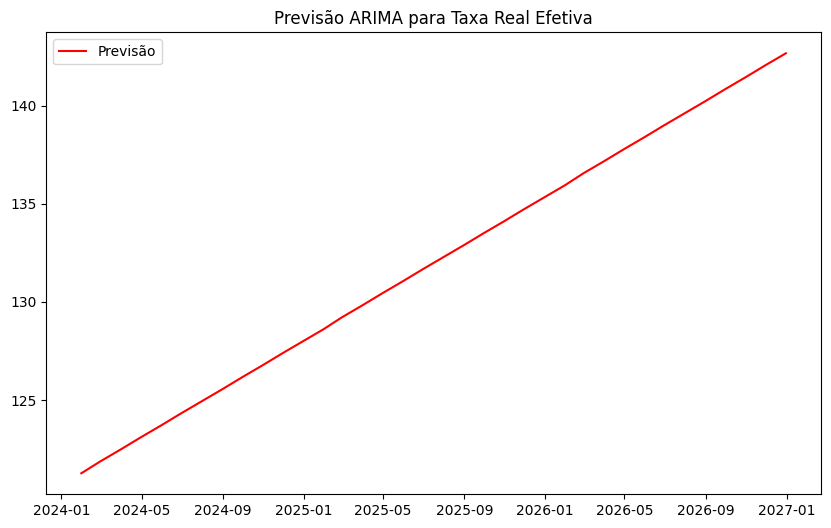

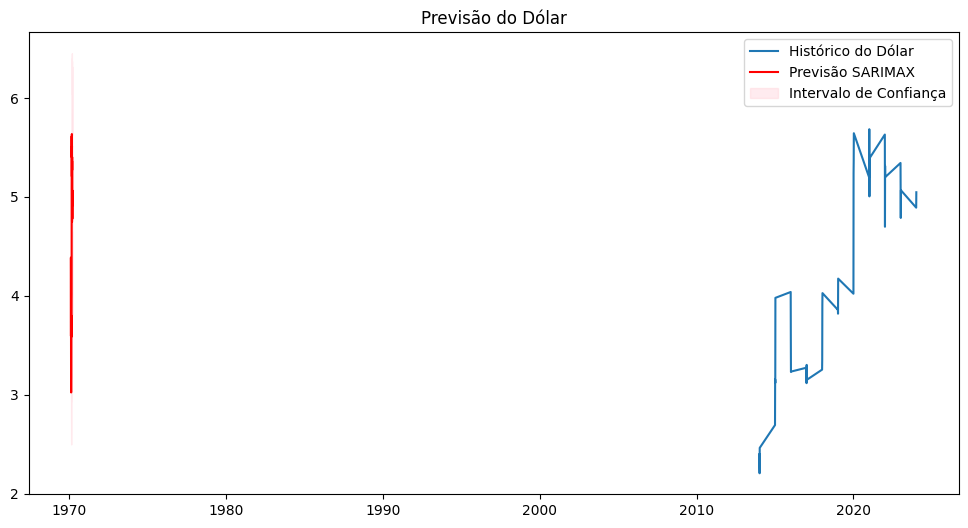

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=863.939, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=865.930, Time=0.04 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=866.547, Time=0.10 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=865.931, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=868.153, Time=0.29 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=866.554, Time=0.09 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=868.153, Time=0.28 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=870.153, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=865.571, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=867.553, Time=0.05 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=868.358, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=867.555, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=869.847, Time=0.49 sec
 ARIMA(0,1,1)(2,0,

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Valor Dolar   No. Observations:                   42
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  20.401
Date:                Sun, 01 Dec 2024   AIC                            -24.802
Time:                        23:29:18   BIC                            -11.093
Sample:                             0   HQIC                           -19.810
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7257      0.075      9.632      0.000       0.578       0.873
x2            -0.0789      0.057     -1.374      0.169      -0.191       0.034
x3            -0.0145      0.027     -0.536      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-73-9b0e14bb60d3>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=36, freq='M'), previsao, label='Previsão', color='red')


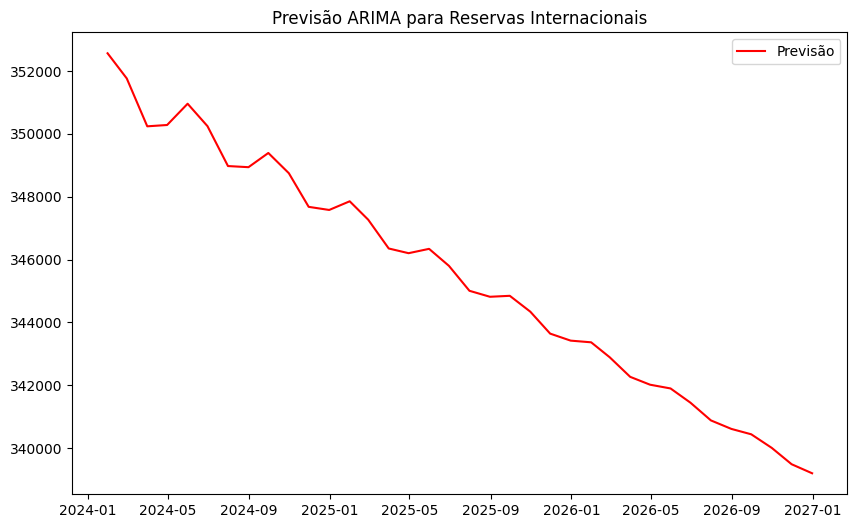

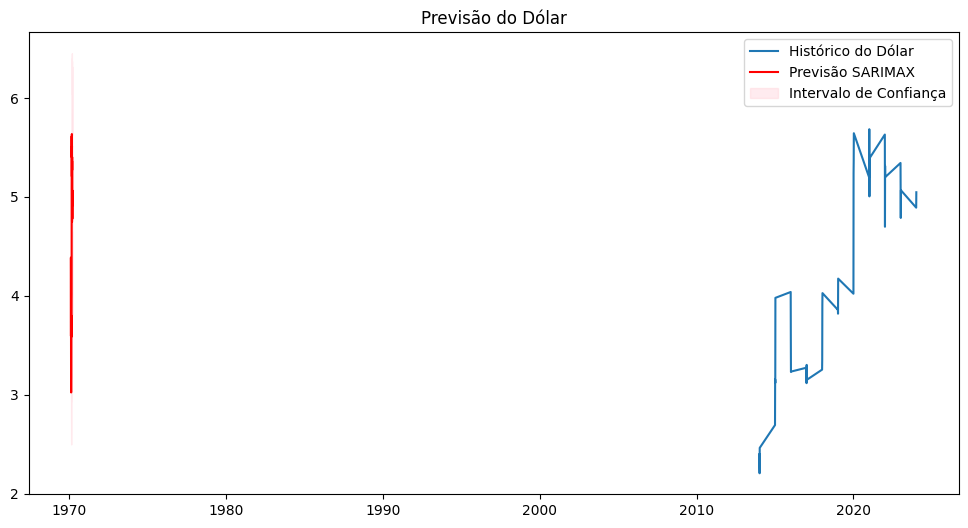

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=41.095, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=43.029, Time=0.11 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=45.010, Time=0.23 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=43.025, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=44.908, Time=0.35 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=46.881, Time=0.70 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=45.002, Time=0.40 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=46.885, Time=0.74 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=42.442, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=44.332, Time=0.44 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=46.265, Time=0.68 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=44.343, Time=0.30 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Valor Dolar   No. Observations:                   42
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  20.401
Date:                Sun, 01 Dec 2024   AIC                            -24.802
Time:                        23:30:11   BIC                            -11.093
Sample:                             0   HQIC                           -19.810
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7257      0.075      9.632      0.000       0.578       0.873
x2            -0.0789      0.057     -1.374      0.169      -0.191       0.034
x3            -0.0145      0.027     -0.536      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-73-9b0e14bb60d3>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=36, freq='M'), previsao, label='Previsão', color='red')


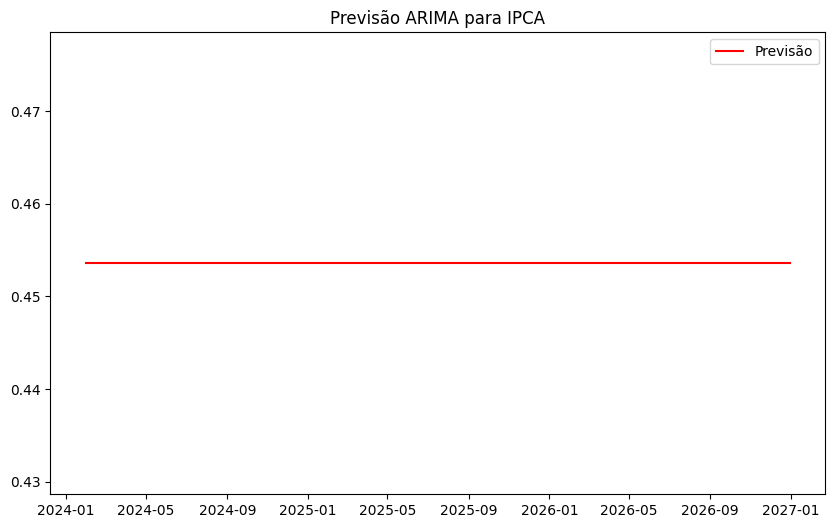

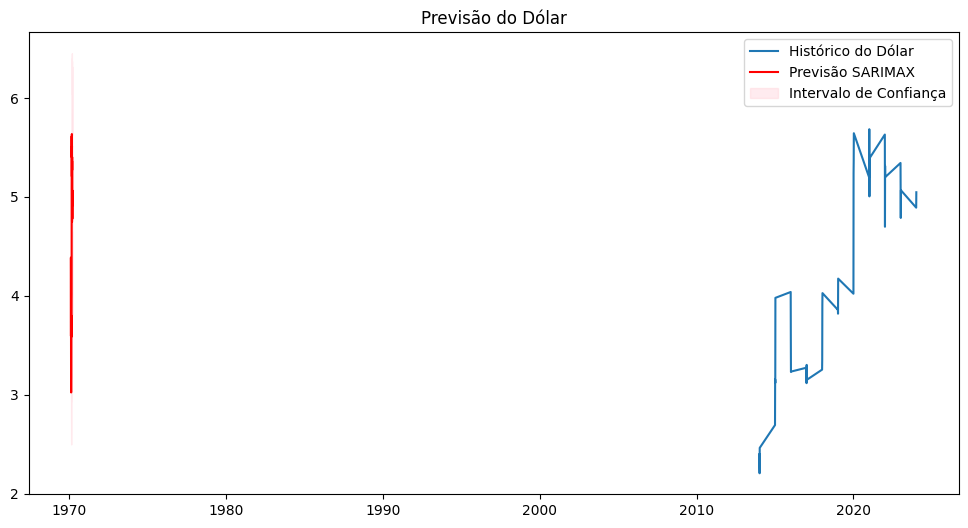

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-224.376, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-228.052, Time=0.10 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-226.180, Time=0.41 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-226.669, Time=0.18 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=-224.194, Time=0.36 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=-226.314, Time=0.40 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=-224.217, Time=0.74 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=-222.224, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-262.753, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-262.563, Time=0.30 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-260.677, Time=0.52 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-262.238, Time=0.27 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-260.551, Time=0.48 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-258.713, Time=1.09 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Valor Dolar   No. Observations:                   42
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  20.401
Date:                Sun, 01 Dec 2024   AIC                            -24.802
Time:                        23:31:14   BIC                            -11.093
Sample:                             0   HQIC                           -19.810
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7257      0.075      9.632      0.000       0.578       0.873
x2            -0.0789      0.057     -1.374      0.169      -0.191       0.034
x3            -0.0145      0.027     -0.536      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-73-9b0e14bb60d3>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=36, freq='M'), previsao, label='Previsão', color='red')


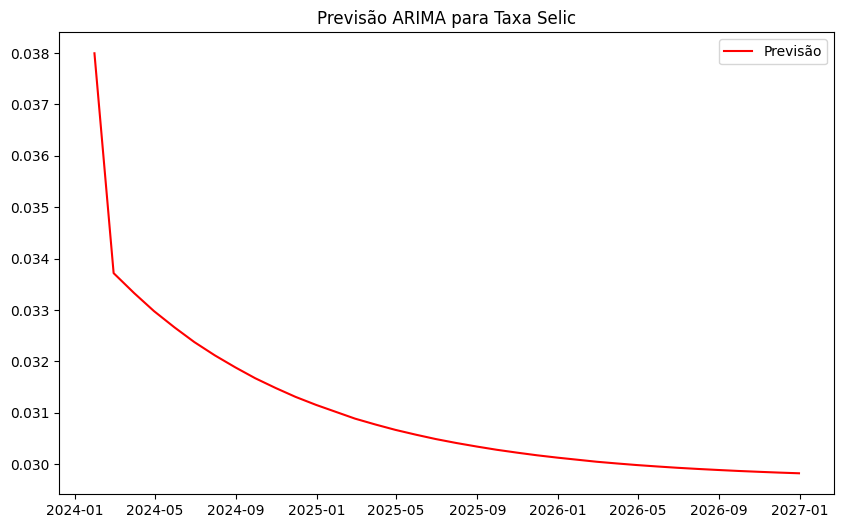

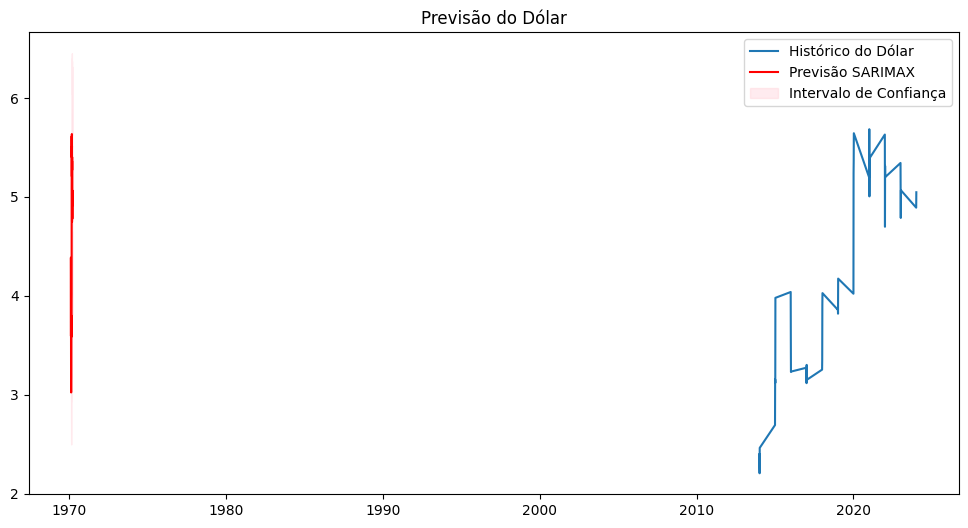

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=619.468, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=621.446, Time=0.07 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=621.930, Time=0.22 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=621.454, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=623.442, Time=0.11 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=623.938, Time=0.37 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=621.949, Time=0.41 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=624.101, Time=0.15 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=621.243, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=623.245, Time=0.14 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=622.284, Time=0.32 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=623.232, Time=0.23 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=625.168, Time=0.25 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=624.273, Time=1.76 sec
 ARIMA(0,1,1)(

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Valor Dolar   No. Observations:                   42
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  20.401
Date:                Sun, 01 Dec 2024   AIC                            -24.802
Time:                        23:31:58   BIC                            -11.093
Sample:                             0   HQIC                           -19.810
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7257      0.075      9.632      0.000       0.578       0.873
x2            -0.0789      0.057     -1.374      0.169      -0.191       0.034
x3            -0.0145      0.027     -0.536      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-73-9b0e14bb60d3>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=36, freq='M'), previsao, label='Previsão', color='red')


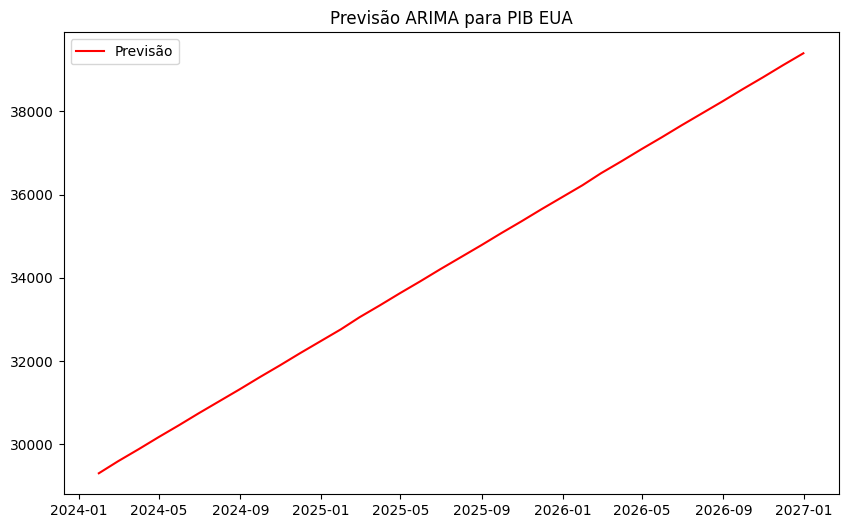

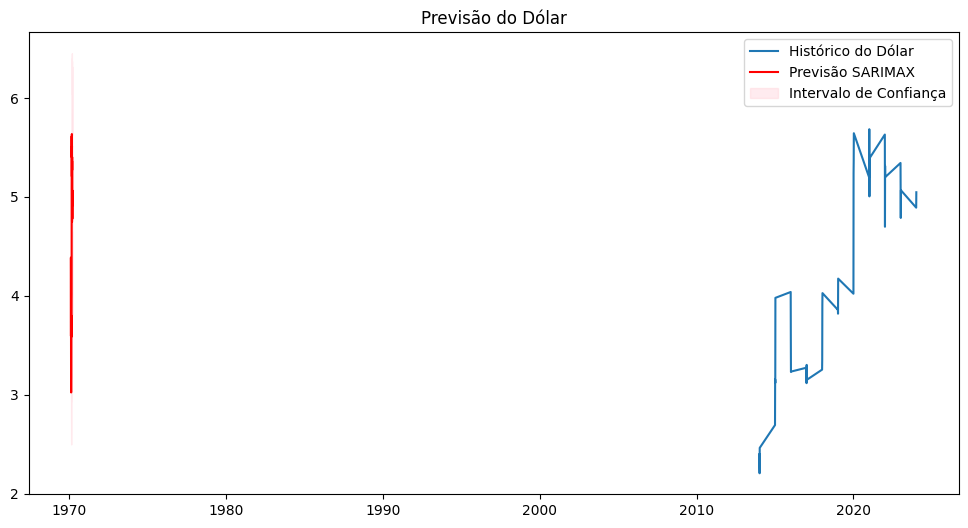

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=42.377, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=43.278, Time=0.13 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=44.661, Time=0.15 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=43.034, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=44.805, Time=0.14 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=46.428, Time=0.73 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=44.739, Time=0.24 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=46.601, Time=2.53 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=41.499, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.486, Time=0.11 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=44.175, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=42.339, Time=0.18 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=44.256, Time=0.31 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=45.996, Time=0.91 sec
 ARIMA(0,1,1)(2,0,0)[12] int

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Valor Dolar   No. Observations:                   42
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  20.401
Date:                Sun, 01 Dec 2024   AIC                            -24.802
Time:                        23:32:49   BIC                            -11.093
Sample:                             0   HQIC                           -19.810
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7257      0.075      9.632      0.000       0.578       0.873
x2            -0.0789      0.057     -1.374      0.169      -0.191       0.034
x3            -0.0145      0.027     -0.536      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-73-9b0e14bb60d3>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=36, freq='M'), previsao, label='Previsão', color='red')


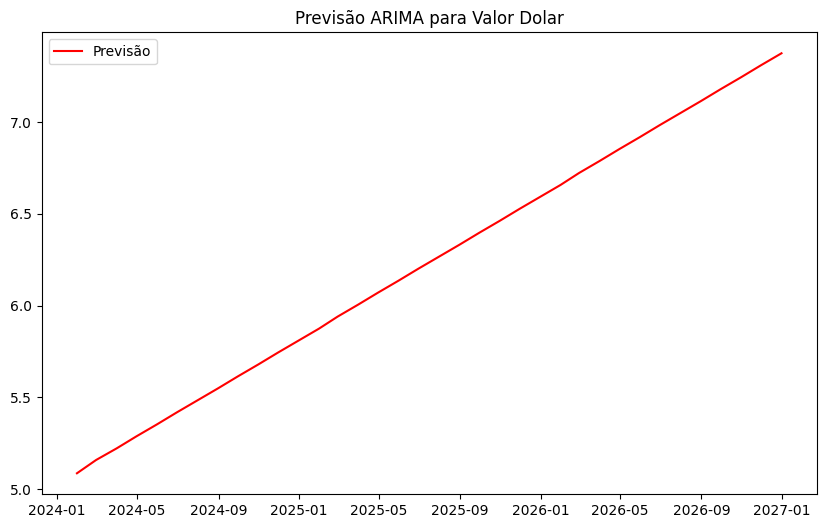

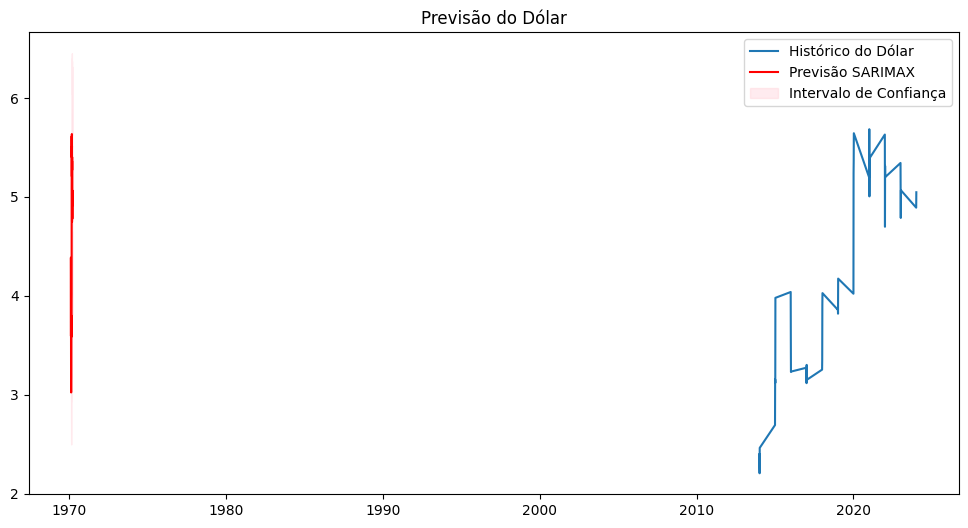

In [73]:
# Inicializa as previsões
previsoes_dict = {}

# Interar as colunas numéricas do DataFrame (excluindo a coluna de data)
for column in data.columns:
    # Selecione a coluna data
    ts = data[column]

    # Verificar e tratar valores NaN (preenchendo com a média)
    if ts.isnull().any():
        # Opção 1: Preencher com a média
        ts = ts.fillna(ts.mean())

    # Ajuste do modelo ARIMA
    stepwise_model = auto_arima(ts, start_p=1, start_q=1, start_d=0, start_P=0,
                                 max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

    # Exibir o AIC do modelo para cada coluna
    print(f"Modelo para a coluna {column}: AIC = {stepwise_model.aic()}")

    # Variável alvo e variáveis explicativas
    variavel_alvo = ['Valor Dolar']
    variaveis_explicativas = ['Taxa Real Efetiva', 'Reservas Internacionais', 'IPCA', 'Taxa Selic', 'PIB EUA']

    # Separar as séries
    y = data[variavel_alvo].dropna()
    X = data[variaveis_explicativas].dropna()

    # Sincronizar as datas
    X, y = X.align(y, join='inner', axis=0)

    # Padronizar as variáveis explicativas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Ajustar o modelo ARIMAX
    modelo = SARIMAX(y, exog=X_scaled, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    resultado = modelo.fit()

    # Resumo do modelo
    print(resultado.summary())

    # Fazer previsões (próximos 12 períodos)
    X_forecast = X_scaled[-36:]  # Usar últimas entradas como exemplo
    previsoes = resultado.get_forecast(steps=36, exog=X_forecast)
    intervalo_confianca = previsoes.conf_int()
    previsoes_dolar = previsoes.predicted_mean

    # Previsão para os próximos 36 períodos using ARIMA model
    previsao = stepwise_model.predict(n_periods=36)

    # Armazenar previsões
    previsoes_dict[column] = previsao

    # Visualize ARIMA predictions
    plt.figure(figsize=(10, 6))
    # Assuming 'serie' is your DataFrame or Series with a DatetimeIndex
    # You might need to adjust 'serie' based on your actual data
    plt.plot(pd.date_range(data.index[-1], periods=36, freq='M'), previsao, label='Previsão', color='red')
    plt.title(f"Previsão ARIMA para {column}")  # Use 'column'
    plt.legend()
    plt.show()

    # Visualize SARIMAX results (for 'Valor Dolar')
    plt.figure(figsize=(12, 6))
    plt.plot(y, label='Histórico do Dólar')
    plt.plot(previsoes_dolar.index, previsoes_dolar, label='Previsão SARIMAX', color='red')
    plt.fill_between(previsoes_dolar.index, intervalo_confianca.iloc[:, 0], intervalo_confianca.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança')
    plt.legend()
    plt.title('Previsão do Dólar')
    plt.show()

PREVISÃO TOTAL DO DÓLAR

Treinando modelo SARIMAX para o Dólar...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Valor Dolar   No. Observations:                   42
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  20.401
Date:                Mon, 02 Dec 2024   AIC                            -24.802
Time:                        00:12:17   BIC                            -11.093
Sample:                             0   HQIC                           -19.810
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7257      0.075      9.632      0.000       0.578       0.873
x2            -0.0789      0.057     -1.374      0.169      -0.191       0.034
x3            -0.0145      0.027     -0.536      0.5

<ipython-input-106-1142bc2a6dac>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


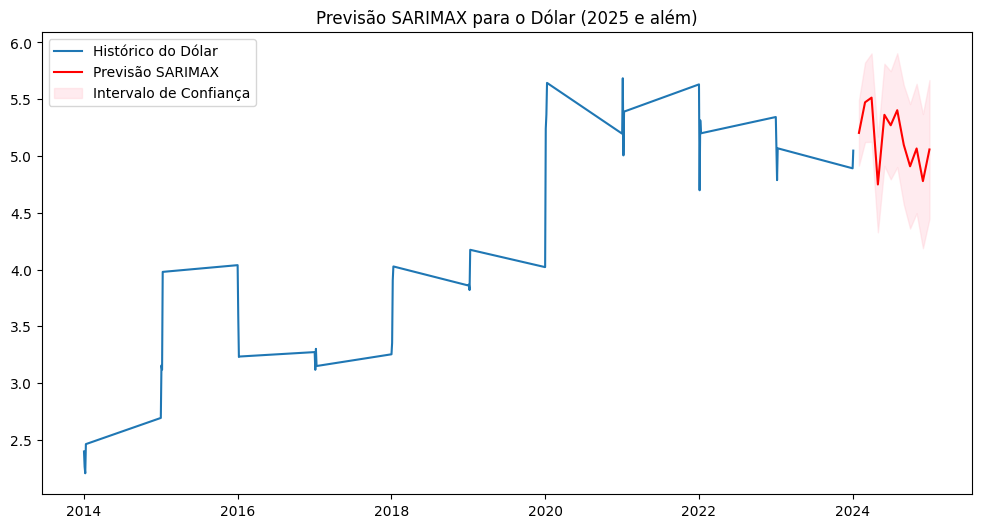

In [106]:
# VerifiCA se o índice é datetime
if not isinstance(data.index, pd.DatetimeIndex):
    raise ValueError("O índice dos dados deve estar no formato DatetimeIndex.")

# Variáveis do SARIMAX para colunas
variavel_alvo = 'Valor Dolar'
variaveis_explicativas = ['Taxa Real Efetiva', 'Reservas Internacionais', 'IPCA', 'Taxa Selic', 'PIB EUA']

# Preparar as séries para SARIMAX
if variavel_alvo in data.columns:
    print("Treinando modelo SARIMAX para o Dólar...")

    # Define as variáveis alvos e explicativas que realizaão a previsão
    y = data[variavel_alvo].dropna()
    X = data[variaveis_explicativas].dropna()

    # Sincronizar datas
    X, y = X.align(y, join='inner', axis=0)

    # Padronizar variáveis explicativas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Ajustar o modelo SARIMAX
    sarimax_model = SARIMAX(
        y, exog=X_scaled,
        order=(1, 1, 1), seasonal_order=(0, 0, 0, 0)
    )
    resultado = sarimax_model.fit()

    # Resumo do modelo
    print(resultado.summary())

    # Fazer previsões (12 períodos futuros)
    future_dates = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')
    X_future = X_scaled[-12:]  # Exemplo, ajuste conforme suas variáveis futuras
    sarimax_forecast = resultado.get_forecast(steps=12, exog=X_future)
    intervalo_confianca = sarimax_forecast.conf_int()
    previsoes_dolar = pd.Series(sarimax_forecast.predicted_mean.values, index=future_dates)

    # Visualizar previsões SARIMAX
    plt.figure(figsize=(12, 6))
    plt.plot(y, label='Histórico do Dólar')
    plt.plot(previsoes_dolar, label='Previsão SARIMAX', color='red')
    plt.fill_between(
        previsoes_dolar.index,
        intervalo_confianca.iloc[:, 0],
        intervalo_confianca.iloc[:, 1],
        color='pink', alpha=0.3, label='Intervalo de Confiança'
    )
    plt.legend()
    plt.title('Previsão SARIMAX para o Dólar (2025 e além)')
    plt.show()

UNIÃO DOS DADOS FUTUROS

In [107]:
# Criar DataFrame com previsões SARIMAX trimestrais a partir de 2025
# Ajustar a frequência das datas futuras para trimestres
future_dates_quarters = pd.date_range(start='2025-01-01', periods=12, freq='Q')

# Criar DataFrame de previsões trimestrais
previsoes_dolar = pd.DataFrame({
    'Data': future_dates_quarters,  # Datas trimestrais
    'Valor Dolar': previsoes_dolar[:12].values,  # Apenas 12 previsões (3 anos)
})

# Garantir que a coluna de data no dataset histórico esteja formatada corretamente
data_historico = data.copy()
if 'Data' not in data_historico.columns:
    data_historico['Data'] = data_historico.index

# Filtrar o dataset histórico para incluir apenas datas até o final de 2024
data_historico = data_historico[data_historico['Data'] < '2025-01-01']

# Combinar dados históricos com previsões trimestrais
data_atualizado = pd.concat([data_historico, previsoes_dolar], ignore_index=True)

# Ordenar o dataset atualizado por data
data_atualizado = data_atualizado.sort_values(by='Data').reset_index(drop=True)

# Exibir as últimas linhas do dataset atualizado para verificação
print(data_atualizado.tail(10))

# Salvar o novo dataset para uso futuro
data_atualizado.to_csv("Dados_futuros.csv", index=False)

print("Dataset atualizado com previsões trimestrais a partir de 2025 salvo como 'dados_series_temporais_trimestrais.csv'.")

    Taxa Real Efetiva  Reservas Internacionais  IPCA  Taxa Selic  PIB EUA  \
44                NaN                      NaN   NaN         NaN      NaN   
45                NaN                      NaN   NaN         NaN      NaN   
46                NaN                      NaN   NaN         NaN      NaN   
47                NaN                      NaN   NaN         NaN      NaN   
48                NaN                      NaN   NaN         NaN      NaN   
49                NaN                      NaN   NaN         NaN      NaN   
50                NaN                      NaN   NaN         NaN      NaN   
51                NaN                      NaN   NaN         NaN      NaN   
52                NaN                      NaN   NaN         NaN      NaN   
53                NaN                      NaN   NaN         NaN      NaN   

    Valor Dolar       Data  
44     5.514045 2025-09-30  
45     4.749125 2025-12-31  
46     5.362718 2026-03-31  
47     5.270554 2026-06-30  
48     

<ipython-input-107-d852b2d046b2>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates_quarters = pd.date_range(start='2025-01-01', periods=12, freq='Q')
